# WebScraping | Raspagem de dados #Biblioteca Beutiful Soup e Requests

In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [45]:
#URL PARA RASPAGEM DE DADOS
url = "https://ufu.br"

In [46]:
#FUNCAO PARA TER PERMISSAO NA PAGINA
request = requests.get(url)
print(request)

#https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status

<Response [200]>


In [47]:
#CONTEUDO DA URL
soup = BeautifulSoup(request.text, "html.parser")
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">

<html dir="ltr" lang="pt-br" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<link href="https://ufu.br/sites/ufu.br/themes/govbr_theme/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<link href="https://ufu.br/" rel="canonical"/>
<link href="https://ufu.br/" rel="shortlink"/>
<title>UFU | Universidade Federal de Uberlândia</title>
<style>
@import url("https://ufu.br

In [48]:
titulos=[]
barra_esquerda = soup.find('ul',class_='menu nav')
for linha in barra_esquerda:
    titulo = linha.text.strip().replace('\n', '')
    if titulo:  # verifica se o titulo nao esta vazio
        titulos.append(titulo)

print(titulos)

['Graduação', 'Pós-graduação', 'Educação a Distância', 'Educação Básica', 'Educação Profissional', 'Residência e Internato', 'Internacionalização', 'Pesquisa e Inovação', 'Extensão e Cultura', 'Assistência estudantil', 'Estude na UFU']


In [49]:
urls=[]
links_esq=barra_esquerda.find_all('a')
for link in links_esq:
    urls.append (url + link.get('href'))

print(urls)

['https://ufu.br/graduacao', 'https://ufu.br/pos-graduacao', 'https://ufu.br/ead', 'https://ufu.br/educacao-basica', 'https://ufu.br/educacao-profissional', 'https://ufu.br/residencia-internato', 'https://ufu.br/internacionalizacao', 'https://ufu.br/pesquisa-inovacao', 'https://ufu.br/extensao-cultura', 'https://ufu.br/assistencia-estudantil', 'https://ufu.br/estude-na-ufu']


In [50]:
#Cria um DataFrame usando o pandas, onde as colunas são 'titulo', 'url'
df = pd.DataFrame({
    'titulo': titulos,
    'url': urls
})

In [51]:
#Exporta o DataFrame para um arquivo CSV no diretório docs, O parâmetro
df.to_csv('webscrapingUFU.csv', index=False)

## WebScraping Segundo Exemplo

In [10]:
from bs4 import BeautifulSoup
import requests

In [52]:
#Armazena a URL da página da qual os dados serão extraídos.
url = "https://www.psicologianapratica.com/material-gratuito"

#Faz uma requisição GET para a URL definida e armazena a resposta na variável request.
request = requests.get(url)

#Converte o conteúdo da resposta HTTP em um objeto BeautifulSoup, o que facilita a busca por elementos no HTML.
soup = BeautifulSoup(request.content, 'html.parser')
print(soup)

<html lang="pt-br">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- CSRF Token -->
<meta content="X6F82Gk32yASpWpAS9VYggeZRFaoLKbLnfQU2Faj" name="csrf-token"/>
<title>Psicologia na Prática - Material Gratuito para Download</title>
<meta content="Material Gratuito para Download" name="title"/>
<meta content="" name="description"/>
<!-- Open Graph / Facebook -->
<meta content="website" property="og:type"/>
<meta content="https://psicologianapratica.com" property="og:url"/>
<meta content="Material Gratuito para Download" property="og:title"/>
<meta content="" property="og:description"/>
<meta content="https://www.psicologianapratica.com/images/logo.png" property="og:image"/>
<!-- Twitter -->
<meta content="summary_large_image" property="twitter:card"/>
<meta content="https://psicologianapratica.com" property="twitter:url"/>
<meta content="Material Gratuito para Download" proper

In [53]:
#Utiliza o BeautifulSoup para buscar todos os elementos da página que possuem as seguintes classes CSS:
#   <h3> com classes específicas (títulos).
#   <p> com classes específicas (descrições).
#   <a> com classes específicas (links de download).
#   <img> com classes específicas (imagens).
titulo = soup.find_all('h3',class_='h4 card-title text-center border-bottom pb-1 mb-2')
descricao = soup.find_all('p',class_='card-text text-center')
link_download = soup.find_all('a',class_='mt-2 btn w-100 fw-bold')
imagem=soup.find_all('img', class_='card-img-top img-thumbnail w-100')


In [54]:
#Inicializa uma lista vazia chamada titulos. Depois, percorre cada elemento da lista titulo (obtido anteriormente)
# e extrai o texto (removendo quebras de linha), adicionando à lista titulos.
titulos=[]
for i in titulo:
    titulos.append(i.text.strip().replace('\n', '').replace('\r', '').strip())

print(titulos)

['Ensino superior - mudanças e desafios na perspectiva dos estudantes', 'Cartilha - Vencendo a Solidão dos Idosos na Pandemia', 'Manual de Atendimento às Vítimas de Violência', 'O que os filmes contam de nós?', 'Depression Anxiety and Stress Scale (DASS-21)', 'Escala Breve de Resiliência', 'Escala Brasileira de Solidão (UCLA-BR)', 'Não caia na rede', 'Cartilha para cuidadores de pessoas com demência', 'Sugestões de tarefas terapêuticas', 'Lista de pensamentos disfuncionais']


In [21]:
#Semelhante ao processamento dos títulos, mas agora para as descrições. Os textos são extraídos da lista descricao
# e armazenados em descricoes.
descricoes=[]
for desc in descricao:
    descricoes.append(desc.text.strip().replace('\n', '').replace('\r', '').strip())

print(descricoes)

['Livro recém lançado sobre vivências no ensino superior', 'Cartilha com temas que podem ser trabalhados para ressignificar a solidão e o estar só. Foi criada durante a pandemia, mas pode ser útil em diversos outros momentos. Contém, ainda, histórias de pessoas reais.', 'Iniciativa do governo do Distrito Federal para orientar sobre atendimento a pessoas vítimas de diversos tipos de violência', 'Livro sobre desenvolvimento humano e Psicologia, em interface com o cinema, organizado pelos professores Tales Vilela Santeiro e Deborah Rosária Barbosa', 'Escala validada para o Brasil, de uso gratuito, para avaliar nível de sintomas de depressão, ansiedade e estresse.', 'Escala validada para o Brasil, de uso gratuito, para avaliar resiliência (recuperação de situações difíceis)', 'Escala validada para o Brasil, de uso gratuito, para avaliação do nível de solidão', 'Jogo de tabuleiro gratuito, no modelo “imprima e jogue” para combater bullying.', 'Cartilha multidisciplinar com orientação para c

In [22]:
#Inicializa uma lista links. Para cada link encontrado, adiciona a URL base à parte específica do link extraído (href),
# criando a URL completa para o download.
links=[]
for link in link_download:
    links.append(url + link.get('href'))

print(links)

['https://www.psicologianapratica.com/material-gratuitohttps://www.psicologianapratica.com/files/upload/523428051-EBOOK_Ensino-Superior (1).pdf', 'https://www.psicologianapratica.com/material-gratuitohttps://www.psicologianapratica.com/files/upload/747358619-Cartilha_solidao.jpg', 'https://www.psicologianapratica.com/material-gratuitohttps://www.psicologianapratica.com/files/upload/1151848789-manual_atendimento_vitimas_violencia_saude_publica_DF.pdf', 'https://www.psicologianapratica.com/material-gratuitohttps://www.psicologianapratica.com/files/upload/1887822023-Livro_Tales_Deborah_cinema_ebook.pdf', 'https://www.psicologianapratica.com/material-gratuitohttps://www.psicologianapratica.com/files/upload/2104109313-DASS-21 - DEPRESSAO-ESTRESSE-ANSIEDADE.pdf', 'https://www.psicologianapratica.com/material-gratuitohttps://www.psicologianapratica.com/files/upload/1173766138-ESCALA BREVE DE RESILIÊNCIA.pdf', 'https://www.psicologianapratica.com/material-gratuitohttps://www.psicologianapratic

In [23]:
#Inicializa uma lista imgs. Para cada elemento de imagem encontrado, extrai o valor da propriedade src
# (que contém o link da imagem) e o adiciona à lista.
imgs=[]
for img in imagem:
    imgs.append(img.get('src'))

print(imgs)

['https://www.psicologianapratica.com/images/upload/671221014.jpg', 'https://www.psicologianapratica.com/images/upload/2068986509.jpg', 'https://www.psicologianapratica.com/images/upload/522444307.png', 'https://www.psicologianapratica.com/images/upload/1835614941.png', 'https://www.psicologianapratica.com/images/upload/431881601.jpeg', 'https://www.psicologianapratica.com/images/upload/1962138295.png', 'https://www.psicologianapratica.com/images/upload/79695659.jpeg', 'https://www.psicologianapratica.com/images/upload/844238707.png', 'https://www.psicologianapratica.com/images/upload/1026861062.png', 'https://www.psicologianapratica.com/images/upload/1830373805.png', 'https://www.psicologianapratica.com/images/upload/336282990.jpeg']


In [55]:
#Cria um DataFrame usando o pandas, onde as colunas são 'titulo', 'descricao', 'link' e 'img',
# e os dados vêm das listas processadas anteriormente.
df = pd.DataFrame({
    'titulo': titulos,
    'descricao': descricoes,
    'link': links,
    'img': imgs
})

#Exporta o DataFrame para um arquivo CSV no diretório docs, com o nome dataset.csv. O parâmetro
# index=False garante que o índice (numeração das linhas) não será incluído no arquivo CSV.
df.to_csv('scrapingconteudosgratuitos.csv', index=False)

# Analise de sentimentos + WebScraping

In [25]:
#URL PARA RASPAGEM DE DADOS
url = "https://www.techtudo.com.br/noticias/2023/09/estudantes-brasileiros-vencem-concurso-de-inteligencia-artificial-da-intel-edinfoeletro.ghtml"

#FUNCAO PARA TER PERMISSAO NA PAGINA
request = requests.get(url)
print(request)


<Response [200]>


<!DOCTYPE HTML>
<html lang="pt-br"> <head><meta charset="utf-8"/><meta content="ie=edge,chrome=1" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/><script id="CDA_AAS" type="text/javascript">
  window.cdaaas = window.cdaaas || {};
  window.cdaaas.SETTINGS = window.cdaaas.SETTINGS || {};
  window.cdaaas.PAGE_ANALYTICS_DATA = {"adsCount":4,"channel":"desktop","contentId":"93779ad5-e372-49eb-9d7a-2aceaca9f018","contentType":"noticias","elementCount":14,"featuredElement":"image","imageCount":0,"metadata":"wordCount=474\u0026wordCountRange=371 a 490\u0026youtube=1\u0026saiba-mais=1\u0026comments=true","pageType":"multi-content","paragraphCount":11,"serviceWorker":false,"videoCount":1};
  window.cdaaas.helpers = window.cdaaas.helpers || {};
  window.cdaaas.internals = {};
  window.HorizonClient = new Promise((resolve) => { window.cdaaas.internals.resolveHorizonPromise = resolve; });
</script><!-- Filers GCOM --><link href="https://s.glbimg.co
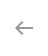

In [26]:
#CONTEUDO DA URL
soup = BeautifulSoup(request.text, "html.parser")
print(soup)

In [56]:
#ANALISE
tags = ['title', 'p']
input = soup.find_all(tags)
print(input)

[<title>Psicologia na Prática - Material Gratuito para Download</title>, <p class="lead my-3">
<p id="isPasted" style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;line-height:normal;font-size:15px;font-family:"Calibri",sans-serif;text-align:justify;'><span style="font-size: 15px; font-family: Arial, sans-serif; color: rgb(33, 37, 41); background-image: initial; background-position: initial; background-size: initial; background-repeat: initial; background-attachment: initial; background-origin: initial; background-clip: initial;">Aqui estão disponibilizados </span><span style="font-size: 15px; font-family: Arial, sans-serif; color: rgb(85, 57, 130); background-image: initial; background-position: initial; background-size: initial; background-repeat: initial; background-attachment: initial; background-origin: initial; background-clip: initial;"><strong>materiais</strong></span><span style="font-size: 15px; font-family: Arial, sans-serif; color: rgb(33, 37, 41); back

In [58]:
texto = soup.get_text()
print(texto)








Psicologia na Prática - Material Gratuito para Download




























            Entrar
            





              Cadastrar 


Psicólogo
Estudante























Página Inicial


Profissionais


Material Gratuito


Cursos


Eventos


Indicação Material


Produtos


Percurso profissional


NAPIS.UFTM


Contato









 Material Gratuito para Download

Aqui estão disponibilizados materiais criados pela profa. Dra. Sabrina Barroso, de domínio público, ou cedidos por seus autores para uso gratuito. Pede-se que sempre sejam mantidas as autorias e respeitados os direitos autorais referentes aos materiais compartilhados. O material será ampliado periodicamente (a cada mês), e podem ser removidos do site/sistema a qualquer momento, sem aviso prévio. Deseja compartilhar algum material de sua autoria? Envie e-mail para contato@psicologianapratica.com, com o assunto "Envio de material". Mas indicamos que o site/sistema se resguarda o direito de compartilhar ap

In [59]:
#REMOVENDO OS ESPACOS ENTRE AS TAGS
texto = soup.get_text(strip=True)
print(texto)

Psicologia na Prática - Material Gratuito para DownloadEntrarCadastrarPsicólogoEstudantePágina InicialProfissionaisMaterial GratuitoCursosEventosIndicação MaterialProdutosPercurso profissionalNAPIS.UFTMContatoMaterial Gratuito para DownloadAqui estão disponibilizadosmateriaiscriados pela profa. Dra. Sabrina Barroso, dedomínio público, oucedidos por seus autorespara uso gratuito.Pede-se que sempre sejam mantidas as autorias e respeitados os direitos autorais referentes aos materiais compartilhados. O material será ampliado periodicamente (a cada mês), e podem ser removidos do site/sistema a qualquer momento, sem aviso prévio.Deseja compartilhar algum material de sua autoria? Envie e-mail paracontato@psicologianapratica.com,com o assunto "Envio de material".Mas indicamos que o site/sistema se resguarda o direito de compartilhar apenas o que desejar.Powered byFroala EditorEnsino superior - mudanças e desafios na perspectiva dos estudantesLivro recém lançado sobre vivências no ensino super

In [61]:
import re

#ADICIONANDO ESPACOS EM TODO INICIO DE CAIXA ALTA SEGUIDA DE CAIXA BAIXA E FINAIS DE PONTUACOES
texto = re.sub(r'([a-z])([A-Z])|(\.|!|\?)', r'\1 \2', texto)

print(texto)

Psicologia na Prática - Material Gratuito para Download Entrar Cadastrar Psicólogo Estudante Página Inicial Profissionais Material Gratuito Cursos Eventos Indicação Material Produtos Percurso profissional NAPIS UFTMContato Material Gratuito para Download Aqui estão disponibilizadosmateriaiscriados pela profa  Dra  Sabrina Barroso, dedomínio público, oucedidos por seus autorespara uso gratuito Pede-se que sempre sejam mantidas as autorias e respeitados os direitos autorais referentes aos materiais compartilhados  O material será ampliado periodicamente (a cada mês), e podem ser removidos do site/sistema a qualquer momento, sem aviso prévio Deseja compartilhar algum material de sua autoria  Envie e-mail paracontato@psicologianapratica com,com o assunto "Envio de material" Mas indicamos que o site/sistema se resguarda o direito de compartilhar apenas o que desejar Powered by Froala Editor Ensino superior - mudanças e desafios na perspectiva dos estudantes Livro recém lançado sobre vivênci

In [62]:
#TRANSFORMANDO EM UMA FUNCAO
def soup(url):
  request = requests.get(url)
  soup = BeautifulSoup(request.text, "html.parser")
  texto = soup.get_text(strip=True)
  texto = re.sub(r'([a-z])([A-Z])|(\.|!|\?)', r'\1 \2', texto)
  return texto

raspagem = soup(url)

In [39]:
import nltk
nltk.download('punkt')

import string

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("portuguese")

pontuacoes = string.punctuation

#TRANSFORMANDO EM UMA FUNCAO
def preproces(soup):
  tokens = []
  for token in nltk.word_tokenize(texto):
    token = token.lower()
    if token not in stopwords and token not in pontuacoes:
      tokens.append(token)
  return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guilh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guilh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
tokens = preproces(raspagem)
print(tokens)

['estudantes', 'brasileiros', 'vencem', 'concurso', 'inteligência', 'artificial', 'inteltop', 'últimas', 'voltartop', 'últimasúltimas', 'techtudonotíciascomparativosdicas', 'tutoriaisguiaslistasreviewsvídeostudo', 'sobrewebstoriescelulares', 'tablets', 'voltarcelulares', 'tabletsnotícias', 'celularescelularestabletstelefoniasmartwatchese-readerandroidi', 'osfórum', '--', 'i', 'phone', '14iphone', '13galaxy', 's22', 'ultramoto', 'g', 'stylusredmi', 'note', '10jogos', 'voltarjogosnotícias', 'jogosjogos', 'casuaisjogos', 'esportesjogos', 'terrormais', 'jogos', 'voltarmais', 'jogosjogos', 'açãojogos', 'arcadejogos', 'aventurajogos', 'corridajogos', 'estratégiajogos', 'lutajogos', 'raciocíniojogos', 'rpgjogos', 'tabuleirojogos', 'educativosplaystationxboxnintendofórum', '--', 'gta', '5robloxminecraftesports', 'voltaresportsnotícias', 'esportscampeonatostimesatletas', '--', 'cblolliga', 'brasileira', 'free', 'firetwitch', 'tvinformática', 'voltarinformáticanotícias', 'informáticacomputadores

In [41]:
#https://www.liwc.app/demo
#DICIONARIO LIWC

import json

liwc = json.load(open('liwc_pt.json'))

In [63]:
posemo = 0

#chamada da funcao preproces com a raspagem feita do site anteriormente
tokens = preproces(raspagem)

#para cada token na lista de tokens
#se esse token estiver no dicionario liwc
#e for uma positiva emocao
#fazer contagem e adicionar na lista

posemos = []
for token in tokens:
  if token in liwc:
    if "posemo" in liwc [token]:
      posemos.append(token)
      posemo +=1

posemo = round(posemo/len(tokens),2)
print (posemo*100,"%")

print(posemos)
len(posemos)

9.0 %
['mantidas', 'respeitados', 'direitos', 'compartilhados', 'deseja', 'compartilhar', 'resguarda', 'compartilhar', 'desejar', 'superior', 'livro', 'superior', 'vencendo', 'criada', 'reais', 'livro', 'avaliar', 'avaliar', 'avaliação', 'jogo', 'jogue', 'sugestões', 'sugestões', 'deseje', 'sugestões']


25

In [64]:
#Transformando em uma funcao com mais sentimentos

def sentiment_analysis(raspagem, liwc):
    tokens = preproces(raspagem)

#iniciando e zerando as variaveis
    negemo = 0
    posemo = 0
    verb = 0

#criando as listas
    negs = []
    poss = []
    verbs = []

#para cada token na lista de tokens
#se esse token estiver no dicionario liwc
#e for uma das emocoes
#fazer contagem e adicionar na lista

    for token in tokens:
        if token in liwc:
            if "negemo" in liwc [token]:
                negemo +=1
                negs.append(token)
            if "posemo" in liwc [token]:
                posemo +=1
                poss.append(token)
            if "verb" in liwc [token]:
                verb +=1
                verbs.append(token)

#calculando as porcentagens
    negemo = round(negemo / len(tokens),2)
    posemo = round(posemo / len(tokens),2)
    verb = round(verb / len(tokens),2)

#exibindo as porcentagem e a lista de cada emocao
    print ("NEG:",negemo*100,"%", " POS:", posemo*100,"%", " VERB:", verb*100,"%")
    print("NEG:",negs,"\nPOS:",poss,"\nVER:",verbs)


sentiment_analysis(raspagem, liwc)

NEG: 3.0 %  POS: 9.0 %  VERB: 9.0 %
NEG: ['temas', 'contém', 'violência', 'violência', 'depressão', 'ansiedade', 'difíceis', 'combater', 'comuns'] 
POS: ['mantidas', 'respeitados', 'direitos', 'compartilhados', 'deseja', 'compartilhar', 'resguarda', 'compartilhar', 'desejar', 'superior', 'livro', 'superior', 'vencendo', 'criada', 'reais', 'livro', 'avaliar', 'avaliar', 'avaliação', 'jogo', 'jogue', 'sugestões', 'sugestões', 'deseje', 'sugestões'] 
VER: ['entrar', 'uso', 'mantidas', 'compartilhados', 'podem', 'removidos', 'deseja', 'indicamos', 'resguarda', 'desejar', 'lançado', 'podem', 'trabalhados', 'criada', 'pode', 'contém', 'contam', 'uso', 'uso', 'uso', 'combater', 'uso', 'deseje', 'indicamos', 'adquirir']
